In [2]:
"""
例子为MNIST，对手写图片进行分类。
神经网络hello world。
"""
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


(784,)
(28, 28)


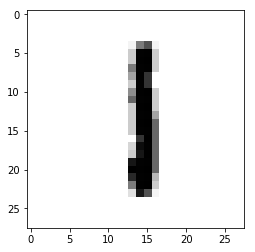

In [4]:
# 看看数据
print(mnist.train.next_batch(50)[0][0].shape)
data = mnist.train.next_batch(50)[0][0]
reshape_data = data.reshape([28, 28])

print(reshape_data.shape)

import matplotlib.pyplot as plt
plt.imshow(reshape_data, cmap=plt.cm.binary)
plt.show()

In [5]:
# 封装网络用到的API
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)


def conv2d(x, W):
    return tf.nn.conv2d(x, 
                        W, 
                        strides= [1, 1, 1, 1], 
                        padding= 'SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, 
                          ksize= [1, 2, 2, 1],
                          strides= [1, 2, 2, 1],
                          padding='SAME')

In [6]:
"""
MNIST进阶
"""
sess = tf.InteractiveSession()
# [batch_size, 784]
x = tf.placeholder('float', shape=[None, 784]) 
y_ = tf.placeholder('float', shape=[None, 10])

"""
第一层卷积
"""
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

# [batch_size, 28, 28, 1]
x_image = tf.reshape(x, [-1, 28, 28, 1]) 

# [batch_size, 28, 28, 32]
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1) 
# [batch_size, 14, 14, 32]
h_pool1 = max_pool_2x2(h_conv1) 

"""
第二层卷积
"""
W_conv2 = weight_variable([5, 5, 32, 64]) 
b_conv2 = bias_variable([64]) 

# [batch_size, 14, 14, 64]
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2) 
# [batch_size, 7, 7, 64]
h_pool2 = max_pool_2x2(h_conv2)

"""
全连接层 or 密集连接层
"""
w_fc1 = weight_variable([7*7*64, 1024])
b_fc1 = bias_variable([1024])

# [batch_size, 7*7*64]
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
# [batch_size, 1024]
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, w_fc1) + b_fc1)

"""
dropout
"""
keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

"""
输出层
"""
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

# [batch_size, 10]
y_conv = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

# 计算损失和添加优化器
# cross_entropy = -tf . reduce_mean(y_ * tf.log(tf.clip_by_value(y_conv , le-10, 1.0)))
cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

# 评估模型
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# 初始化
sess.run(tf.initialize_all_variables())

for i in range(10000):
  batch = mnist.train.next_batch(50)

  if i%100 == 0:
    train_accuracy = accuracy.eval(feed_dict={x:batch[0], 
                                              y_: batch[1], 
                                              keep_prob: 1.0})
    print("step %d, training accuracy %g" % (i, train_accuracy)) 

  train_step.run(feed_dict={x: batch[0], 
                            y_: batch[1],
                            keep_prob: 0.5})

print("test accuracy %g"%accuracy.eval(feed_dict={x: mnist.test.images, 
                                                  y_: mnist.test.labels, 
                                                  keep_prob: 1.0}))



Instructions for updating:
Use `tf.global_variables_initializer` instead.
step 0, training accuracy 0.14
step 100, training accuracy 0.82
step 200, training accuracy 0.88
step 300, training accuracy 0.94
step 400, training accuracy 0.96
step 500, training accuracy 0.98
step 600, training accuracy 0.98
step 700, training accuracy 0.96
step 800, training accuracy 0.96
step 900, training accuracy 0.94
step 1000, training accuracy 0.94
step 1100, training accuracy 1
step 1200, training accuracy 0.98
step 1300, training accuracy 0.98
step 1400, training accuracy 0.98
step 1500, training accuracy 0.98
step 1600, training accuracy 0.98
step 1700, training accuracy 1
step 1800, training accuracy 1
step 1900, training accuracy 0.98
step 2000, training accuracy 1
step 2100, training accuracy 0.98
step 2200, training accuracy 0.98
step 2300, training accuracy 0.98
step 2400, training accuracy 1
step 2500, training accuracy 0.98
step 2600, training accuracy 0.98
step 2700, training accuracy 1
step

In [ ]:
"""
MNIST入门
"""
sess = tf.InteractiveSession()

x = tf.placeholder('float', shape=[None, 784])
y_ = tf.placeholder('float', shape=[None, 10])

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

sess.run(tf.initialize_all_variables())
# [batch_size,]
y = tf.nn.softmax(tf.matmul(x, W) + b)
# 交叉熵计算公式
cross_entropy = -tf.reduce_sum(y_*tf.log(y))

train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

for i in range(1001):
    batch = mnist.train.next_batch(50)
    cross_entropy_result = cross_entropy.eval(feed_dict={
        x: batch[0],
        y_: batch[1]
    })
    # 训练网络
    train_step.run(feed_dict={
        x: batch[0],
        y_: batch[1]})
    if i%100==0:
        # 评估网络
        correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        accuracy_result = accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels})
        print("Step: %d, loss: %s, accuracy: %s" % (i, cross_entropy_result, accuracy_result))
